In [11]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [15]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Loading the csv data to a Pandas Dataframe 
heart_data = pd.read_csv('heart.csv')

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# The number of rows and columns in the dataset 
heart_data.shape

(1025, 14)

In [ ]:
# Getting some info about the data 
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data 
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Checking the distribution of target variable (target values)
# (1) ---------> Defective heart 
# (0) ---------> Healthy heart
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
# Splitting the features and target values 
x = heart_data.drop(columns='target',axis=1)
y = heart_data['target']
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [ ]:
# splitting the data into training data and testing data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify = y,random_state = 2)
print(x.shape,x_train.shape,x_test.shape)

(1025, 13) (820, 13) (205, 13)


In [ ]:
# logistic regression
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with the training data
model.fit(x_train,y_train)

C:\Users\SATISH KUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# accuracy on training data 
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print("Accuracy on Training data : ",training_data_accuracy)

Accuracy on Training data :  0.8524390243902439


In [ ]:
# accuracy on testing data 
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)
print("Accuracy on Testing data : ",test_data_accuracy)

Accuracy on Testing data :  0.8048780487804879


In [ ]:
# input_data = (58,0,0,100,248,0,0,122,0,1,1,0,2)

# #change the input data to a numpy array 
# input_data_as_numpy_array =  np.asarray(input_data)

# # reshape the numpy array as we are predicting for only one instance

# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction = model.predict(input_data_reshaped)
# print(prediction)

# if (prediction[0]==0):
#     print("The person does not have a  Heart Disease")
# else:
#     print("The person has heart disease")

[1]
The person has heart disease


C:\Users\SATISH KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
def get_user_input():
    # User input for each feature
    age = int(input("Age: "))
    sex = int(input("Sex (1 = male; 0 = female): "))
    cp = int(input("Chest pain type (0-3): "))
    trestbps = int(input("Resting blood pressure (in mm Hg): "))
    chol = int(input("Serum cholesterol in mg/dl: "))
    fbs = int(input("Fasting blood sugar > 120 mg/dl (1 = true; 0 = false): "))
    restecg = int(input("Resting electrocardiographic results (0-2): "))
    thalach = int(input("Maximum heart rate achieved: "))
    exang = int(input("Exercise induced angina (1 = yes; 0 = no): "))
    oldpeak = float(input("ST depression induced by exercise relative to rest: "))
    slope = int(input("Slope of the peak exercise ST segment (0-2): "))
    ca = int(input("Number of major vessels (0-3) colored by fluoroscopy: "))
    thal = int(input("Thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect): "))

    # Change the input data to a numpy array
    input_data = (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)
    input_data_as_numpy_array = np.asarray(input_data)

    # Reshape the numpy array as we are predicting for only one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    # Prediction using the trained model
    prediction = model.predict(input_data_reshaped)

    print(prediction)

    if (prediction[0] == 0):
        print("The person does not have Heart Disease")
    else:
        print("The person has Heart Disease")

# Call the function to get user input and make a prediction
get_user_input()

Age: 50
Sex (1 = male; 0 = female): 0
Chest pain type (0-3): 0
Resting blood pressure (in mm Hg): 100
Serum cholesterol in mg/dl: 248
Fasting blood sugar > 120 mg/dl (1 = true; 0 = false): 0
Resting electrocardiographic results (0-2): 0
Maximum heart rate achieved: 122
Exercise induced angina (1 = yes; 0 = no): 0
ST depression induced by exercise relative to rest: 1
Slope of the peak exercise ST segment (0-2): 1
Number of major vessels (0-3) colored by fluoroscopy: 0
Thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect): 2
[1]
The person has Heart Disease


C:\Users\SATISH KUMAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
58,0,0,100,248,0,0,122,0,1,1,0,2

(58, 0, 0, 100, 248, 0, 0, 122, 0, 1, 1, 0, 2)

In [ ]:
import matplotlib.pyplot as plt

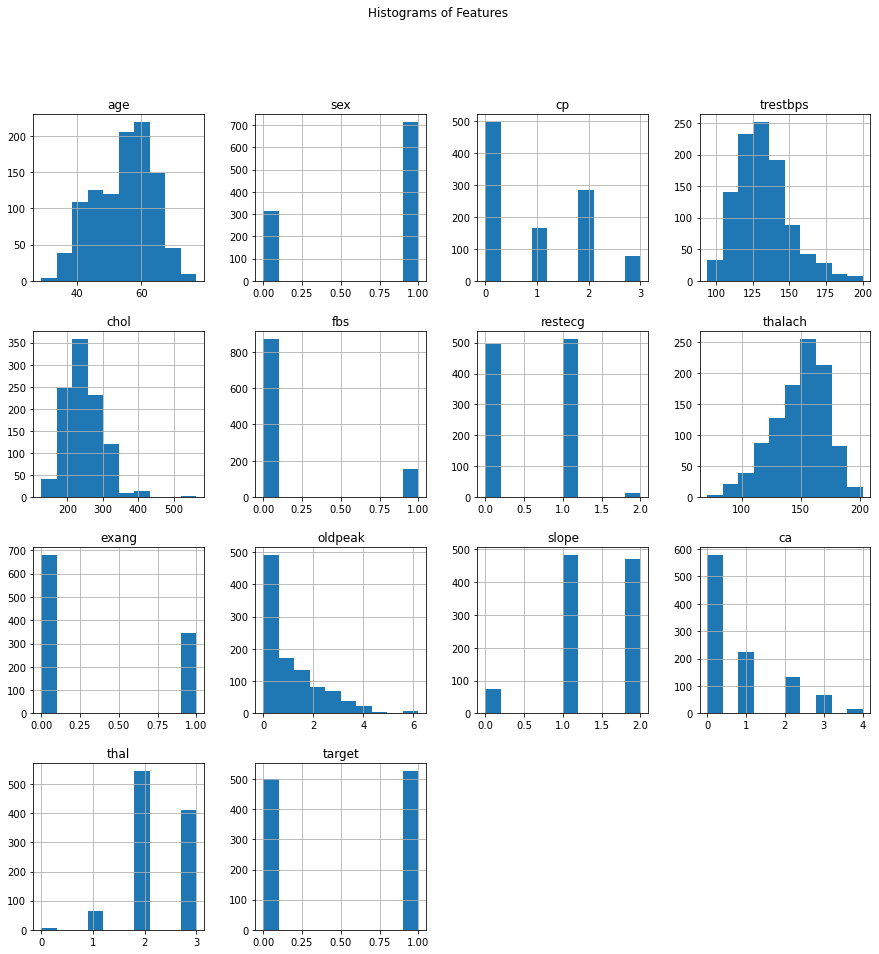

In [ ]:
heart_data.hist(figsize=(15, 15))
plt.suptitle('Histograms of Features')
plt.show()

In [ ]:
import seaborn as sns

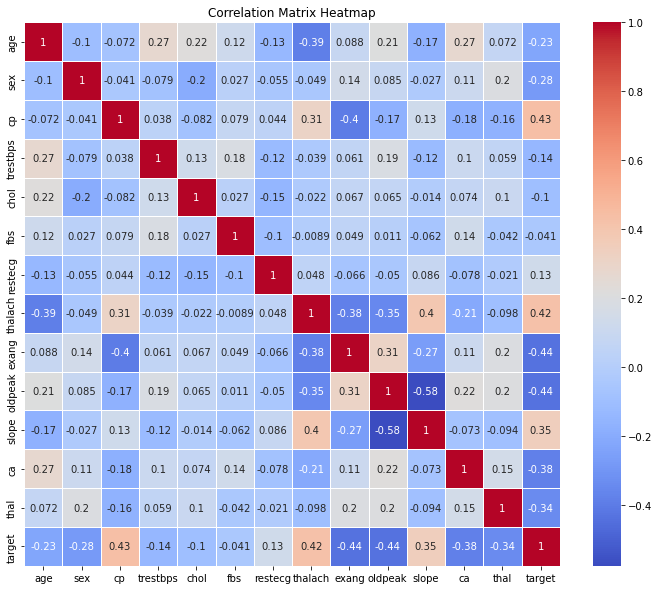

In [ ]:
# Plotting a correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

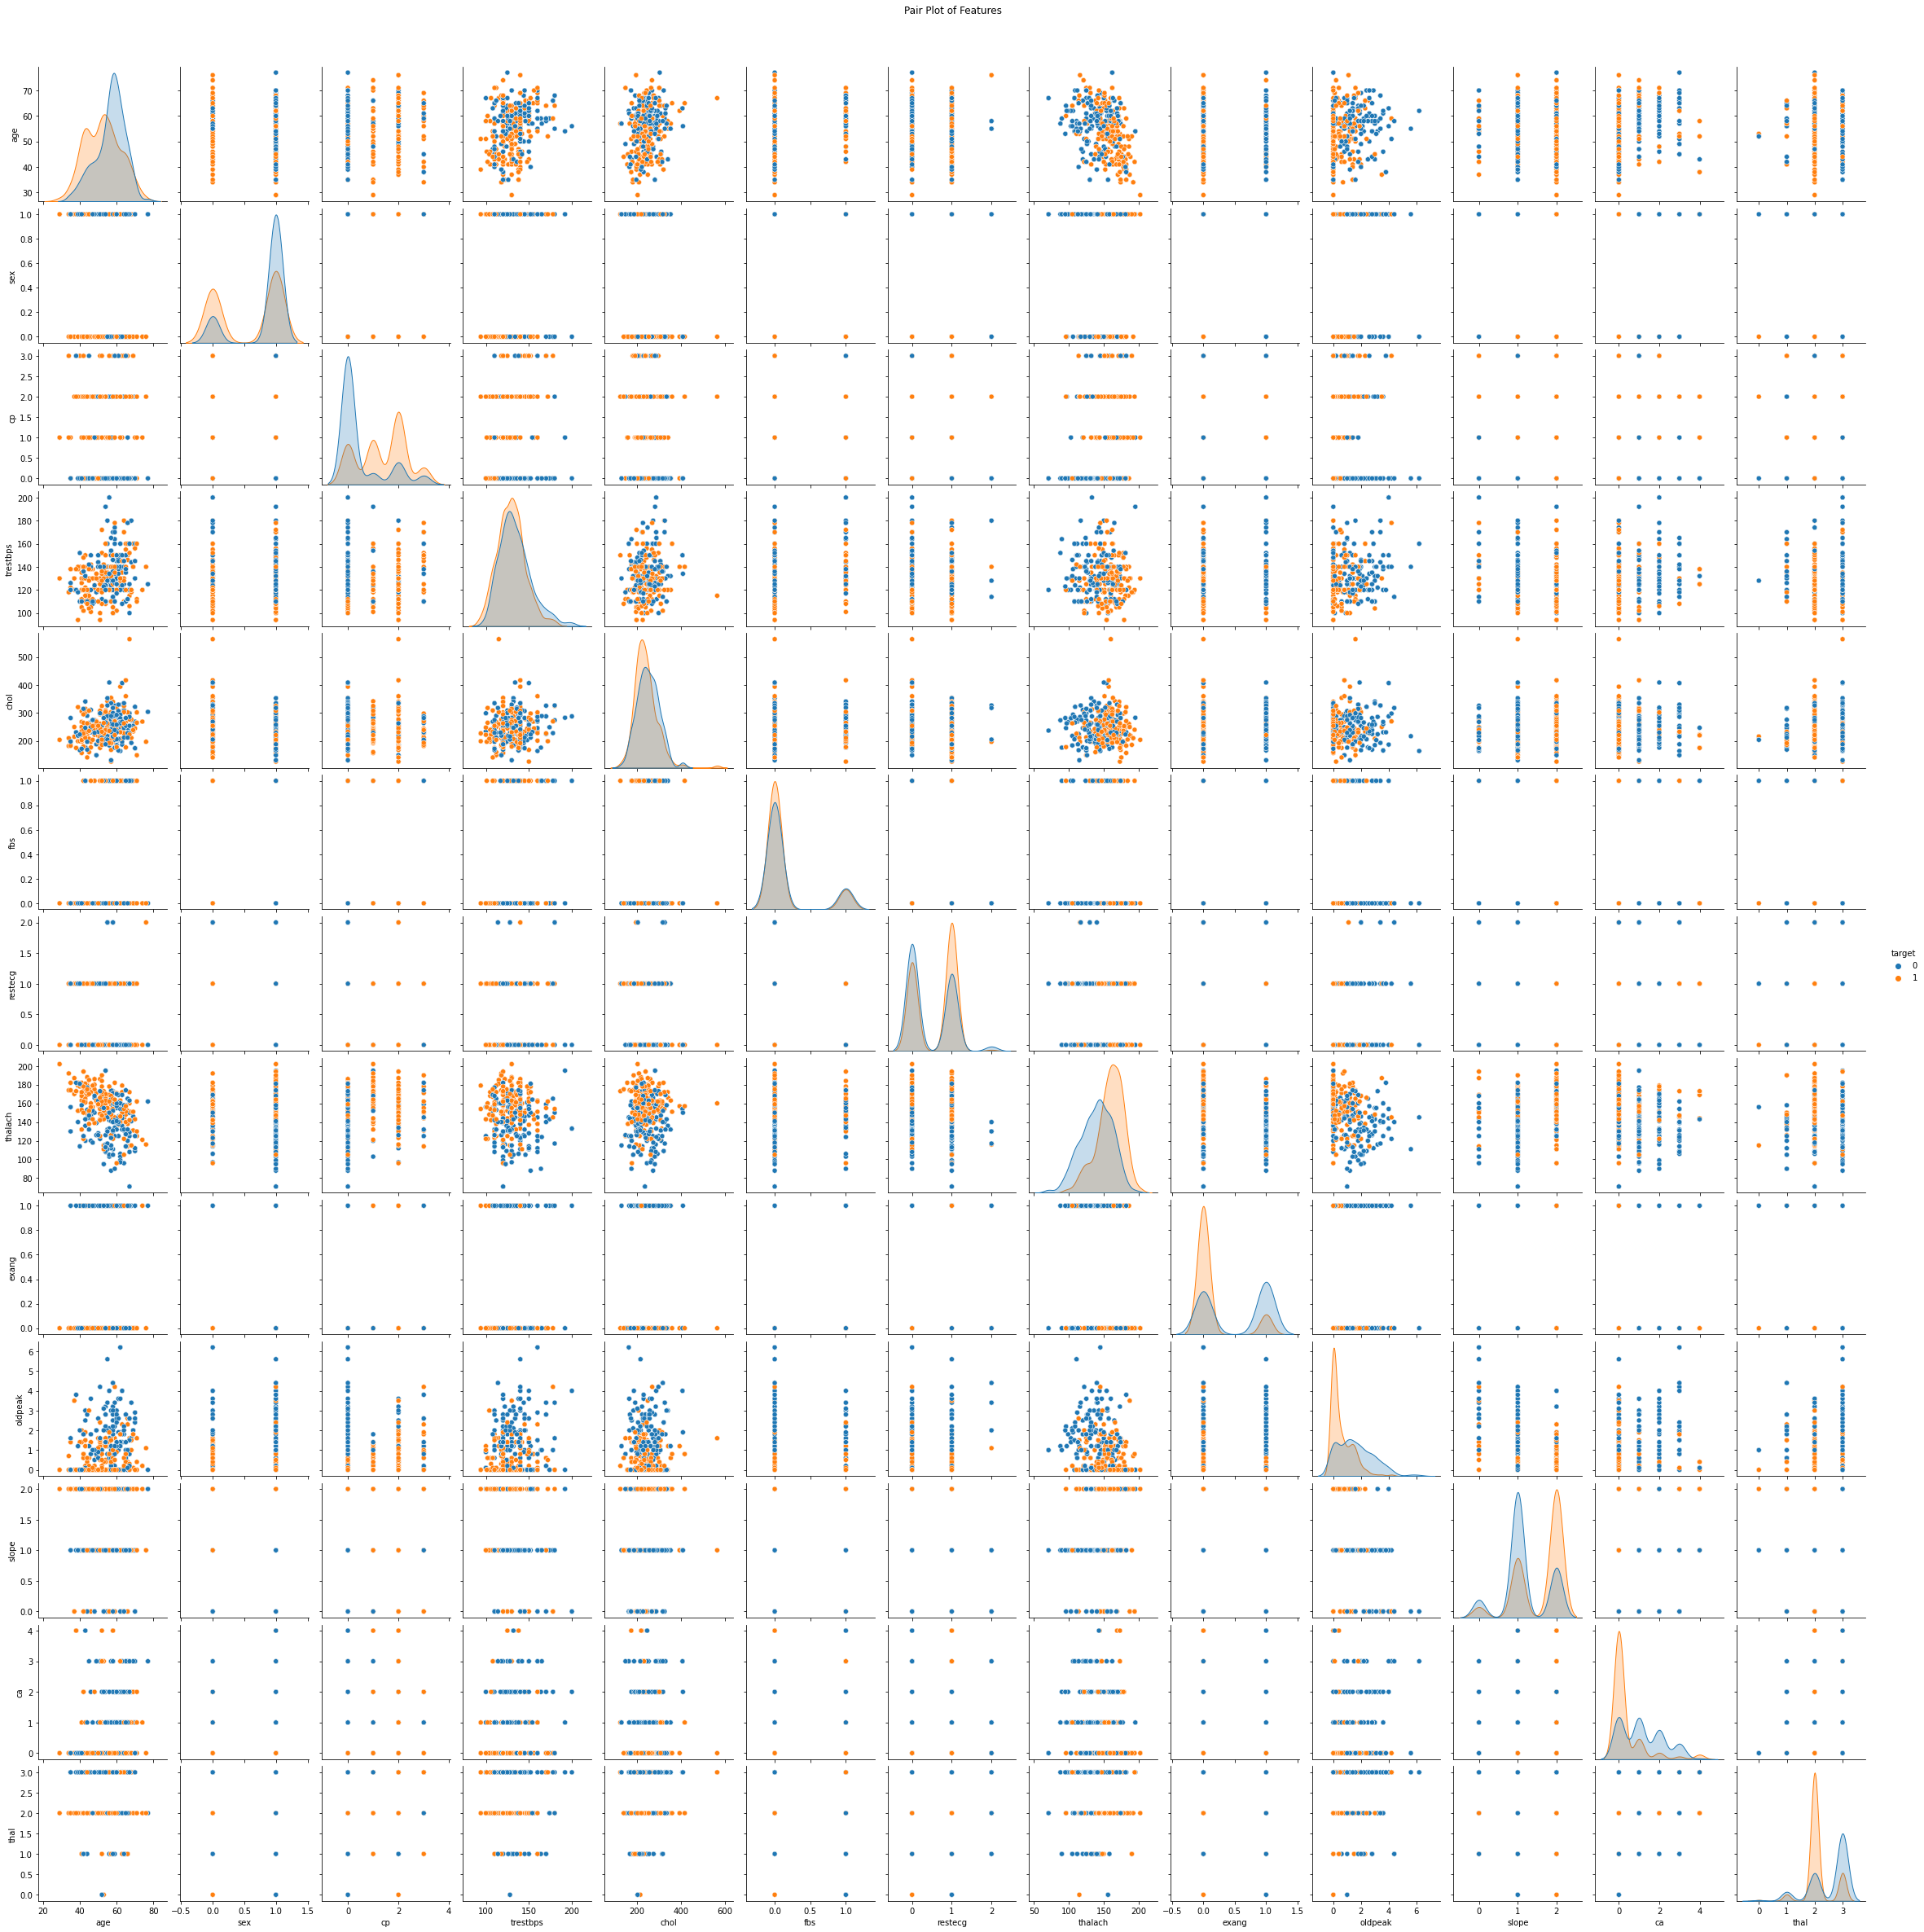

In [ ]:
# Pair plot of the dataset
sns.pairplot(heart_data, hue='target')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

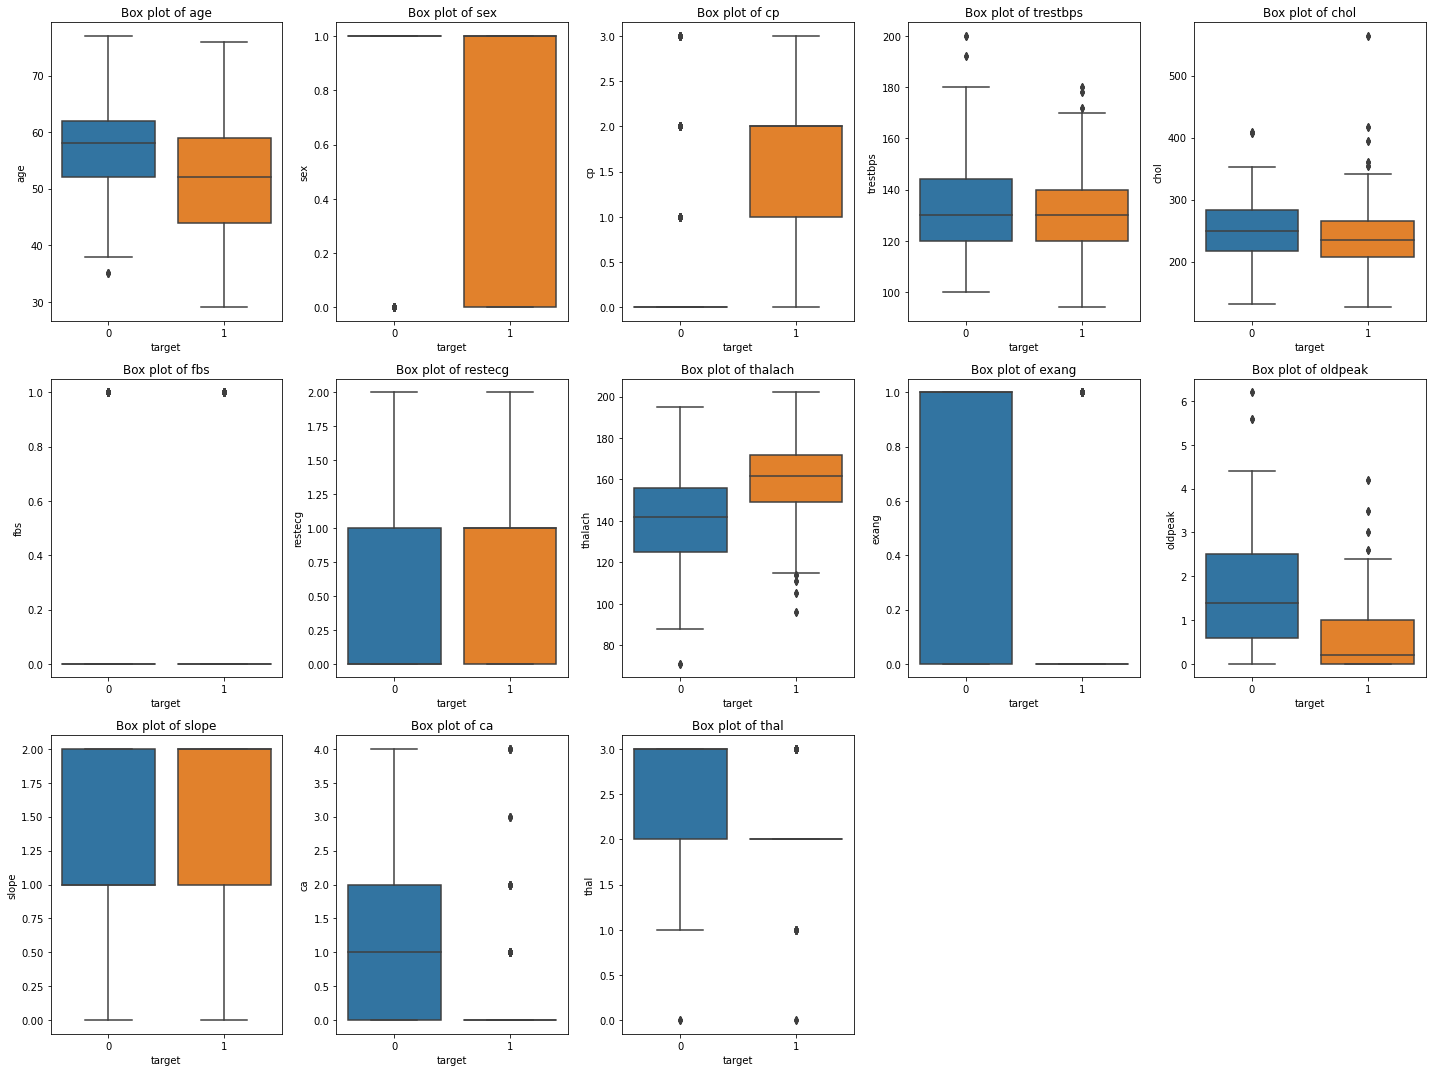

In [ ]:
# Box plots of each feature grouped by the target variable
plt.figure(figsize=(20, 15))
for i, column in enumerate(heart_data.columns[:-1], 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x='target', y=column, data=heart_data)
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()